In [9]:
# analysis
import pandas as pd
import numpy as np
from scipy import stats
from tqdm import tqdm

# visualization
import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# import plotly.figure_factory as ff

# preprocessingn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# metrics
from sklearn.metrics import roc_auc_score

# model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import warnings

warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('./train.csv').drop('id',axis=1)
test = pd.read_csv('./test.csv')
origin = pd.read_csv('./creditcard.csv')
train = pd.concat([train,origin],axis=0).drop_duplicates()

In [12]:
train = train.reset_index(drop=True)
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502821,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
502822,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
502823,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
502824,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
target = 'Class'
# features = ['V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10',
#        'V11', 'V12', 'V13', 'V14', 'V16', 'V17', 'V18', 'V19',
#        'V21', 'V22', 'V24', 'V25', 'V26', 'V27', 'Amount']

features = [ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [16]:
kf = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
models = []
val_scores = []

include_orig = True

for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
    X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
    y_train, y_val = train[target][train_index], train[target][val_index]
    
#     if include_orig:
#         X_train = X_train.append(original[features], ignore_index = True)
#         y_train = y_train.append(original[target], ignore_index = True)
    
    model = RandomForestClassifier(random_state=1,oob_score=True,
                                  max_depth=10)
    
    model.fit(X_train, y_train, eval_set = [(X_val, y_val)])
    
    models.append(model)
    pred = model.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val, pred)
    val_scores.append(score)
    
    print(f'AUC on fold {i}: {score:.4f}')
    
print(f'mean AUC across all folds: {np.mean(val_scores):.4f}')

1it [04:49, 289.90s/it]

AUC on fold 0: 0.8960


2it [11:48, 365.44s/it]

AUC on fold 1: 0.8732


3it [15:46, 307.28s/it]

AUC on fold 2: 0.8739


4it [21:33, 323.15s/it]

AUC on fold 3: 0.8770


5it [25:23, 289.30s/it]

AUC on fold 4: 0.8592


6it [29:19, 271.31s/it]

AUC on fold 5: 0.8723


7it [33:14, 259.55s/it]

AUC on fold 6: 0.8498


8it [37:10, 252.00s/it]

AUC on fold 7: 0.8582


9it [41:02, 245.62s/it]

AUC on fold 8: 0.8412


10it [47:00, 282.01s/it]

AUC on fold 9: 0.9015
mean AUC across all folds: 0.8702


In [17]:
val_scores

[0.896047514861907,
 0.8731895562433576,
 0.8738656177521311,
 0.8770444528194066,
 0.8592370581350961,
 0.8722607207426392,
 0.8498214797467905,
 0.8581657436125276,
 0.8411973108770597,
 0.9015095793009771]

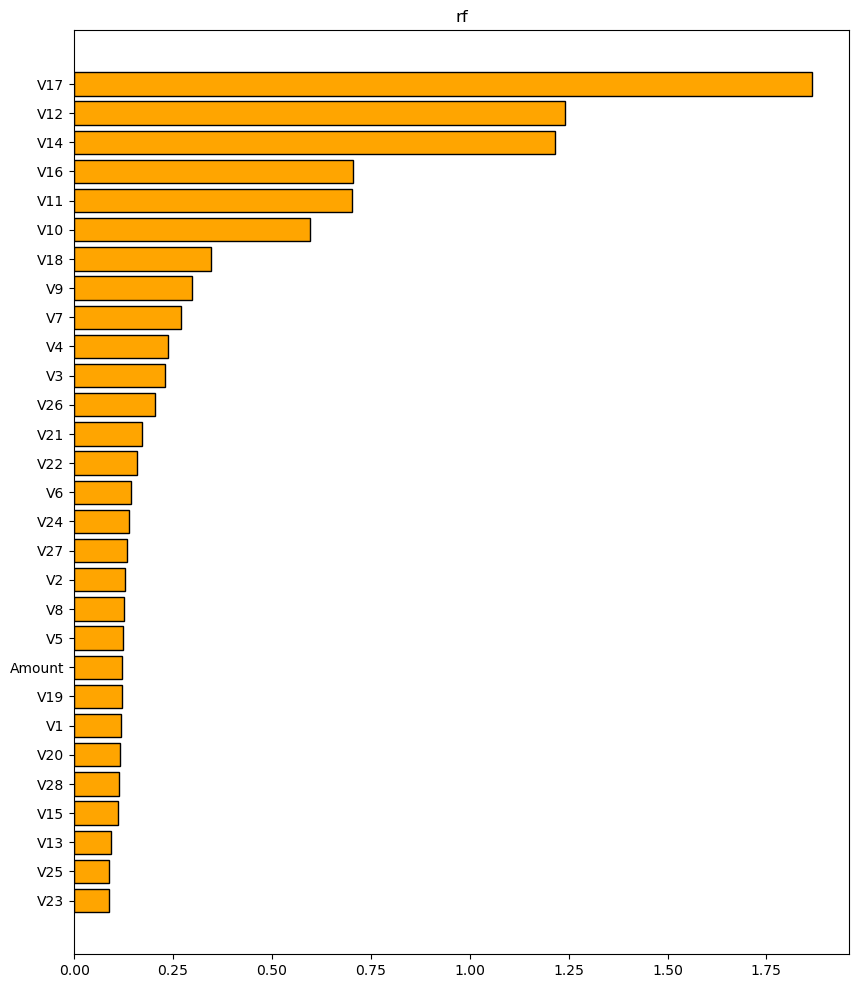

In [18]:
plt.figure(figsize = (10, 12))
cat_imp = np.zeros(len(features))
for model in models[:10]:
    cat_imp += model.feature_importances_
    
plt.barh([features[i] for i in np.argsort(cat_imp)], sorted(cat_imp), 
         color = "orange", edgecolor = "#000000")

plt.title("rf")
plt.show()

In [19]:
rf_preds = []

for model in models[:10]:
    preds = model.predict_proba(test[features])[:,1]
    rf_preds.append(preds)

In [21]:
rf_preds = np.stack(rf_preds).mean(0)
rf_preds # cv 10개 모델의 평균

array([0.0010029 , 0.00077123, 0.0007908 , ..., 0.00090877, 0.00073648,
       0.00075277])

In [23]:
rf_df = pd.DataFrame(data = {'id': test.id, 'Class': rf_preds})

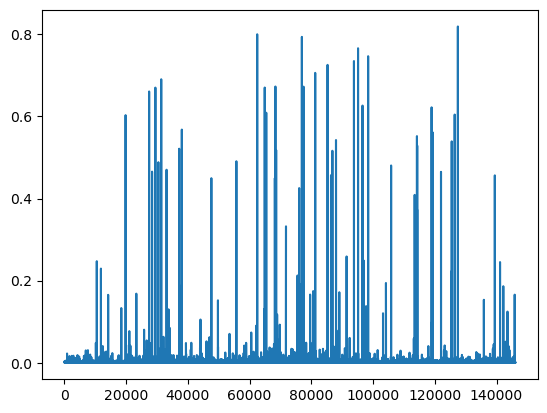

In [24]:
submission = rf_df
submission.Class.plot()
submission.to_csv('submission.csv', index=False)